In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [15]:
from google.colab import files
uploaded = files.upload() #to uplode in colabe

Saving Height-Width.xlsx to Height-Width (2).xlsx


In [149]:
df = pd.read_excel("Height-Width.xlsx") #read file

In [150]:
df.head() #see data first 5

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [151]:
df.tail() ##see data last 5

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [152]:
df[5:11] #in range

,Height,Weight
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676
10,71.195382,186.604926


In [153]:
df['Weight'].head(10) #any specific colume in range

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801
5,152.212156
6,183.927889
7,167.971111
8,175.929440
9,156.399676


In [154]:
df.Height[5:11] #any column in a range

,Height
5,67.253016
6,68.785081
7,68.348516
8,67.018950
9,63.456494
10,71.195382


In [24]:
df.mean() #mean value of all colomun training set

,0
Height,69.024411
Weight,186.891258


In [26]:
df.Height.mean() #mean value of any specific training set

np.float64(69.02441087268781)

In [27]:
df.describe() #all taining set summary

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [29]:
df.Weight.std() # to see specific columns standerd deviation

19.90313163112227

In [30]:
df.Height.std()# to see specific columns standerd deviation

2.8585833281420983

In [31]:
df.shape #to see number of row and column

(3501, 2)

In [35]:
row,col = df.shape
print(row,col)

3501 2


In [36]:
df.isnull() #to see if there in any null value

,Height,Weight
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
3496,False,False
3497,False,False
3498,False,False
3499,False,False


In [37]:
df.isnull().sum() #to summery of full data set isnull

,0
Height,0
Weight,0


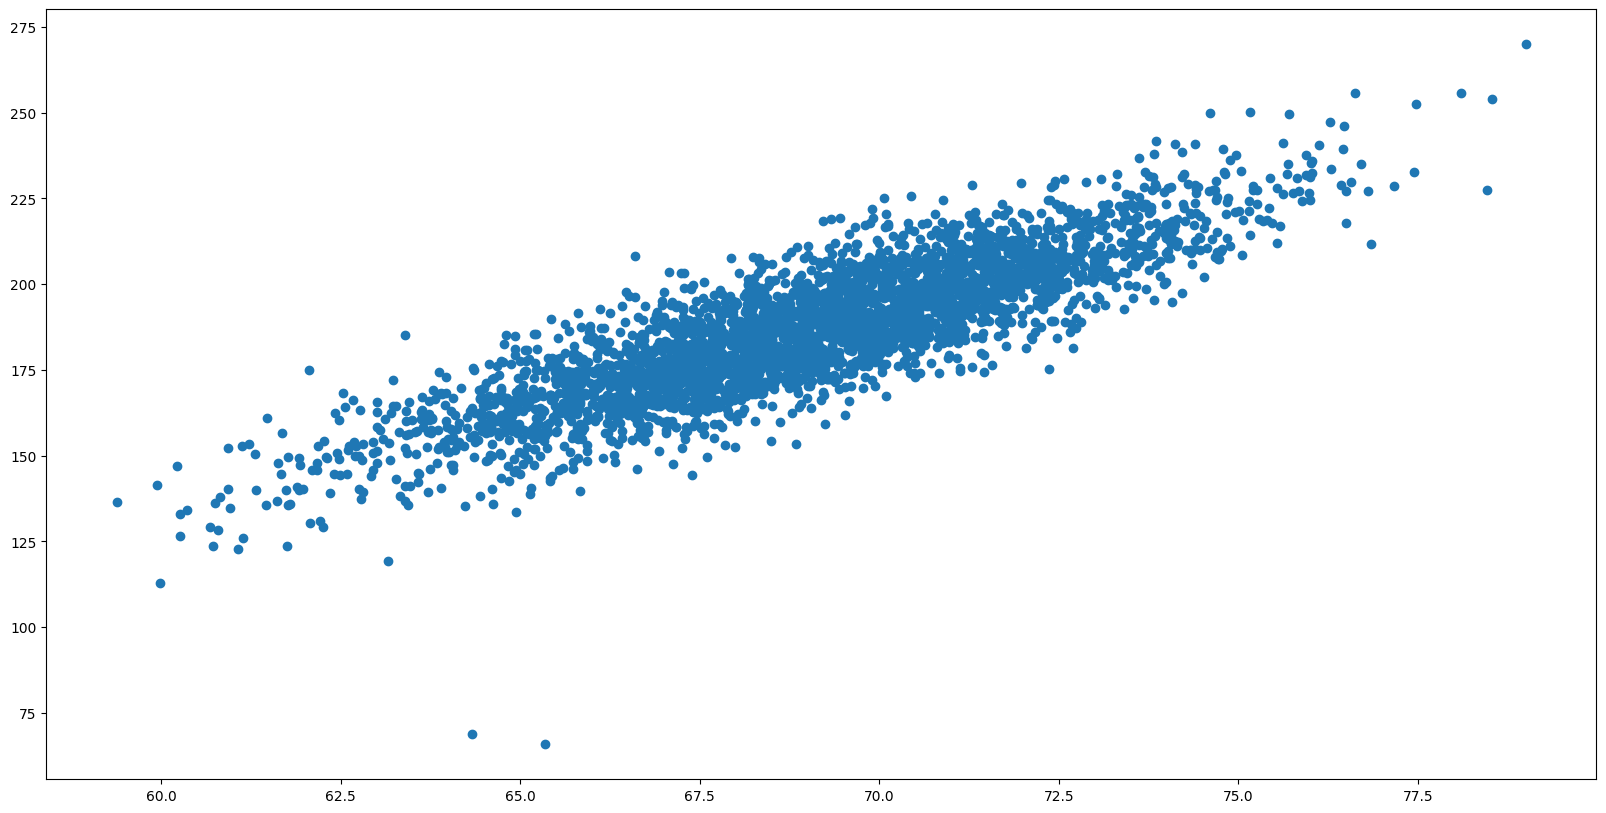

In [96]:
x = df[['Height']]#feature

In [147]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [98]:
y=df['width'] #lebal(have to predict)
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [99]:
from sklearn.model_selection import train_test_split as tts #to split the data set to tain the model. "random_state" for data will shuffle in on way. "test_size" how much will train
x_train,x_test,y_train,y_test =tts(x,y,test_size=0.4,random_state= 251)

In [61]:
x_train.head()

,Height
1117,73.967723
3437,71.678055
67,72.765370
2508,62.562141
1628,68.805935


In [100]:
y_train.head()

,Weight
1117,227.022347
3437,200.896048
67,220.678042
2508,164.051983
1628,174.239708


In [101]:
y_test.head()

,Weight
2671,171.685170
1013,184.723331
74,216.218230
777,179.370856
1184,162.557438


In [102]:
x_test.head()

,Height
2671,66.351331
1013,70.182139
74,72.508120
777,68.317245
1184,66.601283


# ***Linear Regression:***

In [103]:
from sklearn.linear_model import LinearRegression #to import linear regrassion

In [104]:
reg = LinearRegression()

In [105]:
reg.fit(x_train,y_train) #to train data

LinearRegression()

In [106]:
m = reg.coef_ #to find the slop  y=mx+c
print(m)

[5.98392062]


In [107]:
c = reg.intercept_
print(c)

-226.25430168278044


In [108]:
y = m*(73)+c #manually prediction
y

array([210.57190365])

In [109]:
reg.predict([[73]]) #prediction with function

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([210.57190365])

In [110]:
pred=reg.predict(x_test)
pred

array([170.78679677, 193.71004943, 207.62853504, ..., 223.46970653,
       185.1222026 , 190.52838699])

In [123]:
#dataframe for actual result and predictied result
df["predicted Result"] = reg.predict(x)
df.head(10)

,Height,Weight,predicted Result
0,73.847017,241.893563,215.640386
1,68.781904,162.310473,185.331152
2,74.110105,212.740856,217.214686
3,71.730978,220.042470,202.978179
4,69.881796,206.349801,191.912818
5,67.253016,152.212156,176.182406
6,68.785081,183.927889,185.350164
7,68.348516,167.971111,182.737790
8,67.018950,175.929440,174.781773
9,63.456494,156.399676,153.464321


# ***Cost Function:***

In [125]:
from sklearn.metrics import mean_absolute_error,mean_squared_error #to calculate error

In [156]:
mse = mean_squared_error(y_test,pred) #to calculate error
mse

103.99968775470747

In [155]:
mae = mean_absolute_error(y_test,pred)
mae

8.130869811149786

# ***Best Fit Line:***

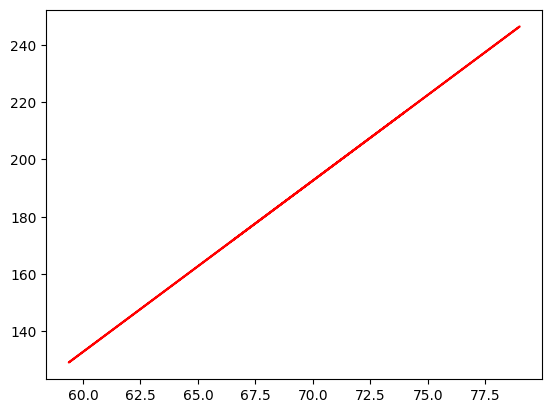

In [157]:
plt.plot(x_train,reg.predict(x_train),color ="red")

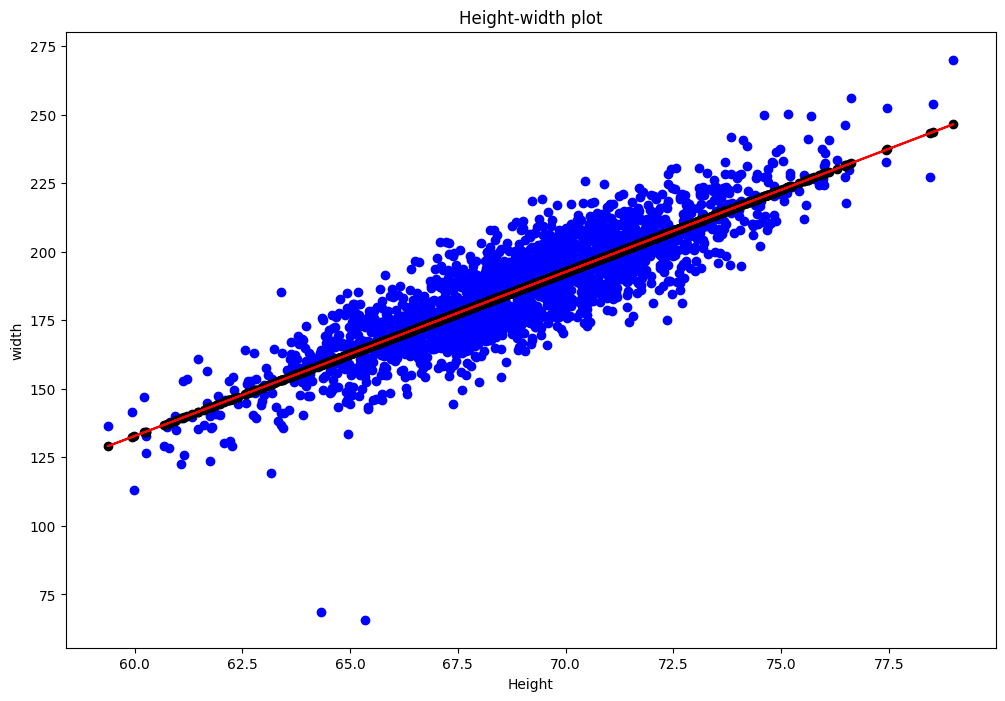

In [158]:
plt.figure(figsize=(12,8))
plt.xlabel('Height')
plt.ylabel('width')
plt.title('Height-width plot')
plt.scatter(x_train,y_train,color="blue") #best fit line created based on train data
plt.plot(x_train,reg.predict(x_train),color="red")
plt.scatter(x_train,reg.predict(x_train),color='black')#blue = total data, red = best fit line goes through which data,
plt.show()

# ***Accuracy:***

In [159]:
#to calculate accuracy
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.7248013148105757


*   by using pandas we can import and load data set
*   by useing pandas we also can create new data set.

In [160]:
x_test.to_csv('x_test.csv') #pandas creating a new csv file (x_test's dataset)
len(x_test)

1401

In [161]:
x_test.head()

,Height
2671,66.351331
1013,70.182139
74,72.508120
777,68.317245
1184,66.601283


In [162]:
len(x_test)

1401

# ***Save The model:***

WE CAN SAVE USING TWO WAY :

1.   Joblid
2.   pickle

Pickle file mostly used


In [168]:
import pickle as pk#pickle
import joblib as jb#joblib

In [169]:
pk.dump(reg,open("save_with_pickle_model1","wb"))

In [175]:

reg2=pk.load(open('save_with_pickle_model1','rb'))
reg2.predict([[73]])

array([210.57190365])

In [176]:
import warnings
warnings.filterwarnings('ignore')

In [178]:
jb.dump(reg,'model_Save_Using_Joblib_model1')

['model_Save_Using_Joblib_model1']